<div class="alert alert-block alert-danger">
TODO change to the  code from lectures and change  progression:
    <ol> 
    <li>experiment with widget- MCQWs to guide them and test what we want them to get out of it</li>
    <li>  Iris data - making the point that we could see one class was separable so setting up a chain of two-way classifiers </li>
    <li> MNIST - introduction to dataset and then make a classsifier for one digit.<br> adapt code from could show code from https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html#sphx-glr-auto-examples-linear-model-plot-sparse-logistic-regression-mnist-py to visualise the weights in the model- e.g. for 8s</li>
    <li> link to blog https://www.zswarth.com/blog/creating-a-perceptron-classifier-for-the-mnist-dataset/ to read and answer one mcq </li>
    <li> discuss chaining vs parallel and when you might use either: <b>mentimeter to mediate?</b> </li>
    </ol></div>

# Perceptrons - The basis of Artificial Neural Networks

Perceptrons, invented by Frank Rosenblatt in the late 1950's,
are a form of supervised machine learning algorithm inspired by neuron cells.
In neurons, signals come in along the dendrites and out along the axon. 
A synapse is the connection between the axon of one cell and the dendrites of another.
Crudely, input signals are 'summed' and if they reach a certain threshold the neuron 'fires'
and sends a signal down the synapse to the connected cells.

![Perceptron](Perceptron.png "Perceptron Image")

Perceptrons are an algorithmic approximation of this process and can learn to solve simple classification problems.
Input values are multiplied by a learnable parameter called a *weight*.
If the sum of the inputs $\times$ weights is over a certain threshold the Perceptron 'fires' and generates an output.
We use the *error* in the output to change the value of the *weights* by a small amount - the *learning rate*.
The process is repeated until the error is 0, or as small as we can get it.

**Note:** The threshold which determines if the Perceptron produces an output is determined by its *activation function*.
For Perceptrons this is often a step function which outputs a 1 or 0 i.e. 'fires' or not. However, it can also be a
non-linear function such as sigmoid, which will always produce a real numbered output in the range 0 to 1.

### Perceptron - Algorithm

1. Set weights to random values in range [-0.5, 0.5]

2. Set learning rate to a small value, usually less than 0.5

3. For each training example in the dataset i.e one 'epoch'

    A. Calculate output (activation)
    
    $sum = \sum\limits_{i=0}^{n} w_i \times x_i$
      
    $if\ sum >\ 0 \\ \;\;\;activation = 1 \\ \\else \\ \;\;\;activation = 0$
       
    B. Calculate error
    
    $error = target \, output - activation$

    C. Update each of the weights values
    
    $change \, in \, weight = error \times input \times learning \, rate$


4. Repeat from step 3 until error is 0 (or as close as possible), or for the number of training epochs.

### Perceptrons - Logical Operators

We are going to use binary data to show that Perceptrons can learn to represent logical functions,
though you could also think about it as a prediction/classification problem
i.e. for a given set of inputs what is the correct output.
A truth table can be used as the Perceptrons *training* data, with each row representing an input example.
Each training example has two inputs (*features*) and one output (*label*).

| Input 1| Input 2| AND | OR  | XOR |
|:------:|:------:|:---:|:---:|:---:|
| 0      | 0      | 0   | 0   | 0   | 
| 0      | 1      | 0   | 1   | 1   |
| 1      | 0      | 0   | 1   | 1   |
| 1      | 1      | 1   | 1   | 0   |

First we will import some python modules and then create the training data.

**Note:** Input data is often denoted as X and labels/target outputs with Y.
Here we are going to use **inputs**, but the target outputs have been labeled **AND**, **OR** and **XOR**.
This is so we can be clear about what the outputs should be.

## Activity 1:
Work through the first few cells ‘Logical Operators’, ‘Implementation’ and ‘Linear Decision Boundary’ sections and try to familiarise yourself with the algorithm and how the process builds a model by learning values for the weights.
How well does it perform on different logical functions?
- You do not need to remember the equation for the calculating the line.
- You should try and understand how this decision boundary relates to the Perceptrons output (and why it can only be straight).



In [25]:
import numpy as np
from random import random
# Create input and target output data
inputs = [[0, 0],
          [1, 0],
          [0, 1],
          [1, 1]] 
print("Input data: " + str(inputs))

target_outputs_AND = [0, 0, 0, 1]
print("AND: " + str(target_outputs_AND))

target_outputs_OR = [0, 1, 1, 1]
print("OR: " + str(target_outputs_OR))

target_outputs_XOR = [0, 1, 1, 0]
print("XOR: " + str(target_outputs_XOR))

Input data: [[0, 0], [1, 0], [0, 1], [1, 1]]
AND: [0, 0, 0, 1]
OR: [0, 1, 1, 1]
XOR: [0, 1, 1, 0]


### Implementation

Now lets write a function to build and train a Perceptron.
This is just an implementation of the algorithm above, except we are going to train one **step** or one **epoch** at a time.
This allows us to see what the algorithm is doing more clearly.

- A training **step** applies the algorithm to just one input example (A, B and C above).
- An **epoch** repeats the training step for all input examples in the data (so in this case 4).

First we define the learning rate and model - run the next cell to define the class we used in the lectures

In [26]:
class two_input_perceptron:
    def  __init__(self,weight1, weight2,biasweight, learningRate):
        ##. <== note we're not constraining weights to be ints now
        self.weight1 = weight1
        self.weight2 = weight2
        self.biasweight = biasweight
        self.learningRate = learningRate ## <== this is new
        
    def predict(self,input1:int,input2:int) -> int:
        ## <== in general we don't need to contstrian the inputs
        summedInput = input1*self.weight1 +input2*self.weight2 + self.biasweight
        if summedInput>0:
            return 1
        else:
            return 0

    def update_weights( self, in1,in2,target):
        error = int (target - self.predict(in1,in2))
        if(error != 0):
            self.biasweight += error * 1 *self.learningRate # bias is always +1
            if (in1>0):
                self.weight1 += error * in1 * self.learningRate
            if (in2>0):
                self.weight2 += error * in2 * self.learningRate           
            return 1
        else:
            return 0     ## <=let the calling function know if it made the right prediction


Now run the cell below to:
- create a perceptron instance, 
- set it's  **learning_rate** variable determines how large a change we will make to the weights each time they are updated.

- run the model for the and data

As it trains, in each epoch you will be told when it makes a prediction error, and what the updated weights are you should see output for the current inputs and target outputs,
training step, epoch and total error for that epoch.

### Activity 1.1: Run the cell below once and make sure you understand which weights are being updated at each step, and why.


In [27]:
#### from random import random

target = target_outputs_AND
# start with random weights
w0=random()
w1 = random()
w2 = random()
print("starting with initial random weights {:.4f}, {:.4f} and {:.4f}".format(w1,w2,w0))

myPerceptron = two_input_perceptron(w1,w2,w0,0.1)


# just keep presenting the test cases nd updating until there are no errors
for epoch in range(50):
    errors = 0
    for testcase in range(4):
        # get the inputs to present
        input1 = inputs[testcase][0]
        input2 = inputs[testcase][1]
        # make the prediction
        prediction = myPerceptron.predict(input1,input2)
        # print output if there were errors
        if (prediction != target[testcase]):
            print('    error with input {} {}, target {}, predicted {} '.format(input1,input2,target[testcase], prediction ))
        thiserror = myPerceptron.update_weights(input1,input2,target[testcase])
        if(thiserror>0):
            print('    after updating weights are now: w1 {:.4f}, w2 {:.4f} biasweight {:.4f}'.format(myPerceptron.weight1,myPerceptron.weight2,myPerceptron.biasweight))
        errors += thiserror

    if(errors >0):
        print("in epoch {} there were {} errors".format(epoch,errors))
    else:
        print(" Perceptron solved the learning problem in {} epochs".format(epoch))
        break

starting with initial random weights 0.6675, 0.4731 and 0.0425
    error with input 0 0, target 0, predicted 1 
    after updating weights are now: w1 0.6675, w2 0.4731 biasweight -0.0575
    error with input 1 0, target 0, predicted 1 
    after updating weights are now: w1 0.5675, w2 0.4731 biasweight -0.1575
    error with input 0 1, target 0, predicted 1 
    after updating weights are now: w1 0.5675, w2 0.3731 biasweight -0.2575
in epoch 0 there were 3 errors
    error with input 1 0, target 0, predicted 1 
    after updating weights are now: w1 0.4675, w2 0.3731 biasweight -0.3575
    error with input 0 1, target 0, predicted 1 
    after updating weights are now: w1 0.4675, w2 0.2731 biasweight -0.4575
in epoch 1 there were 2 errors
    error with input 1 0, target 0, predicted 1 
    after updating weights are now: w1 0.3675, w2 0.2731 biasweight -0.5575
in epoch 2 there were 1 errors
 Perceptron solved the learning problem in 3 epochs


### Activity 1.2: Checking your understanding
1. Now make a prediction about whether you will see exactly the same thing when you run the cell again.
 - Be honest: Write down your answer, and your reasoning *before* you run the cell :)

2. Run the cell above once more.
 - was your answer right?  If not, why not?

3. Change the code so that the target is now target_outputs_OR  
   Again make a prediction about what you expect to see before you run the code.


4. Change the code so that the target is nowtarget_outputs_XOR  
   Again make a prediction about what you expect to see before you run the code.



### Perceptrons - Linear Decision Boundary

To give you an intuition for what the Perceptron is doing, consider the equation for a straight line:

$y = ax + c$

a and c are coefficients just like the learned weights and bias in the Perceptron.
So with a bit of rearranging:
   
$y = (input1 \times weight1) + (input2 \times weight2) + bias \, weight$

Becomes:

$input2 = (-weight1 \div weight2) \times input1) + (-bias \, weight\div weight2)$

- weights 1 and 2 = slope

- bias = intercept

- step function = which side of the line!

So, the Perceptron is essentially learning a function for a straight line which is called the decision boundary.
In this case, which 'class' the set of inputs belongs to i.e. True or False.

You can run the below code to create an interactive widget that allows you to manually adjust the weights.

In [28]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt

%matplotlib inline


def showPerceptron( w1,w2,bias,func): 
    in1 = np.linspace(-5,5,100)
    if (w2==0):
        y=0
    else:
        y = -(bias/w2)  - in1*(w1/w2)
    plt.plot(in1, y, '-r',label="Decision Boundary")
        # plot sample functions
    if(func != ''):
        plt.plot(0,0,'or')
        if(func=='AND'):
            m01 = m10 = 'or'
        else:
            m01=m10='og'
        if(func=='XOR'):
            m11 = 'or'
        else:
            m11 = 'og'
        plt.plot(0,1,m01)
        plt.plot(1,0,m10)
        plt.plot(1,1,m11)
    
    plt.title('Graph of Perceptron decision Boundary')
    plt.xlabel('input1', color='#1C2833')
    plt.ylabel('input2', color='#1C2833')

    plt.xlim(-1.0,2.0)
    plt.ylim(-1.0,2.0)
    plt.legend(loc='upper left')
    plt.grid()

interactive(children=(FloatSlider(value=-0.5, description='w1', max=1.0, min=-1.0), FloatSlider(value=0.5, des…

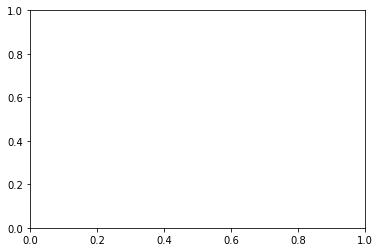

In [15]:
weight1 = widgets.FloatSlider(value=-0.5,min = -1,max = 1)
weight2 = widgets.FloatSlider(value=0.5,min = -1,max = 1)
biasweight = widgets.FloatSlider(value=-0.5,min = -1,max = 1)
funcToModel = widgets.RadioButtons(options=['OR','AND','XOR'])
output=interact(showPerceptron, w1=weight1,w2=weight2,bias=biasweight,func = funcToModel)

In [ ]:
TODO add mcq “if a I have a perceptron that does or, what do I change to make to do amd? Increase decrease w1,2,3

# Activity 2: Learning from  examples with two continuous features 
The aim of this task is to illustrate how Perceptrons can be applied to a larger, more realistic, dataset with real numbered features.  
We will apply the algorithm in using the training step code from before.  
However, this time we will train the perceptron for a fixed number of epochs and then test the model on a held back test set.

In the ‘Training and Testing on Real-Fake Data’ section the first cell generates some random training and test data.
- In this activity we are just going ot consider a problem with two classes.

In the next cell you need to complete the train_perceptron function by copying the relevant code (only the training step!) from previous cells. Once it is complete you should see output of error and accuracy from training.

Next you can complete the test_perceptron function in a similar manner and you should see output of how well the trained model performed on the test data.
- What effect does the learning rate and number of examples per epoch have?
- Try changing some of the parameters of the randomly created data and see what effect it has.



### Perceptrons - Training and Testing on Real-Fake Data

Truth table data and logical functions are a good way to learn the Perceptron algorithm but the data isn't very realistic.

Most problems are much more complex and cannot be represented with binary data or solved with only 4 training examples.
We were also only training for one **step** (one input example) or one **epoch** (all input examples) at a time, so that we
could see what the algorithm was doing.

In supervised learning, generally we want to train for a fixed number of epochs, or until there is no improvement in
the error on the training data. Once training is finished we apply the model (trained weights) to some test data and
measure its performance. This gives us an indication of how well it would perform on new data it has not 'seen' before.

Next we will train and then test a Perceptron on a larger, real numbered dataset so that we can see the process of 
applying machine learning in practice.

As before, we will first import some python modules and then randomly generate some training and test data.
This time the features of the data will be real numbers but there are still only 2 classes/labels, 0 and 1.

It's also helpful to plot the data so that we can see how it is distributed.

**Note:** The make_blobs function generates a random dataset, the centers variable determines how many classes/labels
are in the data, n_features is the number of features each example has and cluster_std is the standard deviation of
each class i.e. how randomly scattered they are from eachother.

In [ ]:
# Import some needed modules
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
%matplotlib inline

# Generate random dataset
num_samples = 150
features, labels = make_blobs(n_samples=num_samples, centers=2, n_features=2, cluster_std=1.0, random_state=0)

# Split data to training and test data, 2/3 for training and 1/3 for testing
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.33)

Shape of training data: (100, 2)
Shape of test data: (50, 2)
First 5 features of training data:
[[ 1.41164912 -1.32573949]
 [ 0.9867701   6.08965782]
 [ 1.45795145  0.65974193]
 [ 1.35269561  3.20438654]
 [ 0.57309313  5.5262324 ]]
First 5 labels of training data:
[1 0 1 0 0]


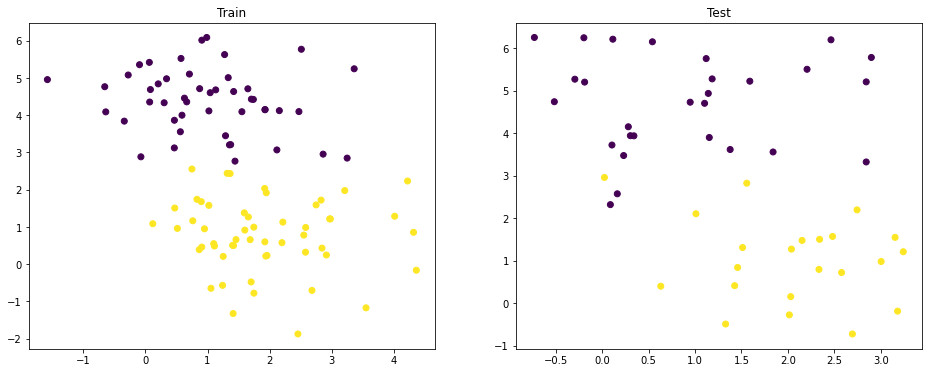

In [29]:
# Print some information about the data
print("Shape of training data: " + str(train_x.shape))
print("Shape of test data: " + str(test_x.shape))
print("First 5 features of training data:")
print(train_x[: 5, :])
print("First 5 labels of training data:")
print(train_y[:5])

# Plot the training and test data side by side using ther labels to set the color of the markers
figure, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(train_x[:,0], train_x[:,1], c=train_y )
ax[0].title.set_text("Train")
ax[1].scatter(test_x[:,0], test_x[:,1], c=test_y)
ax[1].title.set_text("Test")
plt.show()

### Perceptron - Train Function

Now we can define the training function for the Perceptron. It is very similar to the previous, except it will train
for the num_epochs that we define.

The function **inputs** are the training examples, training labels, number of epochs and learning rate.

The function **returns** the trained model i.e. the 3 trained weights.

Every epoch will calculate and print the error and accuracy for that epoch.

Once training is complete we can use the equation from the *Linear Decision Boundary* section above to draw the
decision boundary for the trained model.

In [ ]:
extend binary perceptron to. add fit() function and deal with arbitrary numbers of inputs


class n_input_perceptron:
    def  __init__(self,numInputs, learningRate):
        self.numInputs = numInputs
        # make an array to store our weights and put in random starting values
        self.weights = np.zeroes(self.numInputs)
        for weight in range(numInputs):
            self.weights[weight] = random()
        # qlso set a random initial  bias weight
        self.biasweight = random()
        self.learningRate = learningRate ## <== this is new
        
    def predict(self,input1:int,input2:int) -> int:
        
        summedInput = input1*self.weight1 +input2*self.weight2 + self.biasweight
        if summedInput>0:
            return 1
        else:
            return 0

    def update_weights( self, in1,in2,target):
        error = int (target - self.predict(in1,in2))
        if(error != 0):
            self.biasweight += error * 1 *self.learningRate # bias is always +1
            if (in1>0):
                self.weight1 += error * in1 * self.learningRate
            if (in2>0):
                self.weight2 += error * in2 * self.learningRate           
            return 1
        else:
            return 0     ## <=let the calling function know if it made the right prediction



Initialised model weights:
weight_1: -0.31134500979141777 weight_2: -0.4677391072013787 bias_weight: -0.06737375335073581
Epoch: 1 Error: 100 Accuracy: 0.0
Epoch: 2 Error: 100 Accuracy: 0.0
Epoch: 3 Error: 100 Accuracy: 0.0
Epoch: 4 Error: 100 Accuracy: 0.0
Epoch: 5 Error: 100 Accuracy: 0.0
Epoch: 6 Error: 100 Accuracy: 0.0
Epoch: 7 Error: 100 Accuracy: 0.0
Epoch: 8 Error: 100 Accuracy: 0.0
Epoch: 9 Error: 100 Accuracy: 0.0
Epoch: 10 Error: 100 Accuracy: 0.0
Trained model weights:
w1: -0.31134500979141777 w2: -0.4677391072013787 bw: -0.06737375335073581


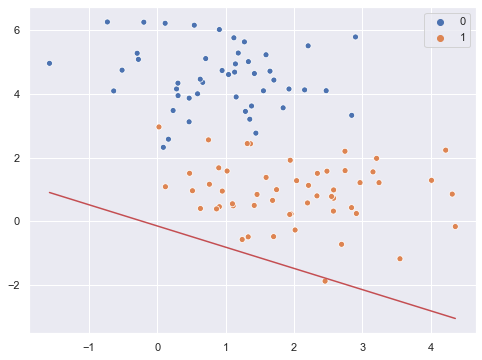

In [2]:
# Define the number of training epochs and learning rate
num_epochs = 10
learning_rate = 0.1

def train_perceptron(inputs, target_outputs, num_epochs, learning_rate):

    # Set the weights to small random values in the range -0.5 to 0.5  
    w1 = np.random.uniform(-0.5, 0.5)
    w2 = np.random.uniform(-0.5, 0.5)
    bw = np.random.uniform(-0.5, 0.5)
    bias = 1
    print("Initialised model weights:")
    print("weight_1: " + str(w1) + " weight_2: " + str(w2) + " bias_weight: " + str(bw))
    
    # Each epoch will loop over the training data once
    for epoch in range(num_epochs):
        epoch_error = 0

        # Loop over all of the input examples
        for i in range(len(inputs)):
            error = -1
            # Calculate sum of inputs * weights

            
            # Activation (step) function


            # Calculate error (desired output - actual output)

            epoch_error += np.absolute(error) # Also keep track of total error for this epoch

            # Update weights (error * input * learning rate)

        
        # Calculate epoch accuracy and print metrics    
        epoch_accuracy = (100/len(inputs)) * (len(inputs) - epoch_error)
        print("Epoch: " + str(epoch + 1) + " Error: " + str(epoch_error) + " Accuracy: " + str(round(epoch_accuracy, 2)))
    return w1, w2, bw

# Call the function to train the Perceptron and return the trained weights
input_w1, input_w2, bias_w = train_perceptron(train_x, train_y, num_epochs, learning_rate)

print("Trained model weights:")
print("w1: " + str(input_w1) + " w2: " + str(input_w2) + " bw: " + str(bias_w))

# Create the range of values for decision boundary
x_range = np.linspace(train_x[:,0].min(), train_x[:,0].max(), 10)
y_range = [((-input_w1/input_w2) * x) + (-bias_w/input_w2) for x in x_range]

# Plot the training data and the decision boundary
figure, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=train_x[:,0], y=train_x[:,1], hue=train_y, ax=ax)
sns.lineplot(x=x_range, y=y_range, color='r', ax=ax)
plt.show()

### Perceptron - Test Function

Now we can test the trained model by making predictions on the test data.

The main difference is that now we **don't** update the weights. So, we just pass in the trained weights and iterate
for one epoch over the training data, recording the error and accuracy.

Finally we can plot the test data and decision boundary as before.

In [ ]:
def test_perceptron(inputs, target_outputs, w1, w2, bw):
    
    # Keep track of the error on the test data
    test_error = 0
    
    # Loop over all of the test examples
    for i in range(len(inputs)):
        error = -1



        test_error += np.absolute(error) # Also keep track of total error testing
      
    # Calculate epoch accuracy and print metrics    
    test_accuracy = (100/len(inputs)) * (len(inputs) - test_error)
    print("Test Error: " + str(test_error) + " Accuracy: " + str(round(test_accuracy, 2)))

# Call the test perceptron function with the test data and trained model    
test_perceptron(test_x, test_y, input_w1, input_w2, bias_w)

# Create the range of values for decision boundary
x_range = np.linspace(test_x[:,0].min(), test_x[:,0].max(), 10)
y_range = [((-input_w1/input_w2) * x) + (-bias_w/input_w2) for x in x_range]

# Plot the training data and the decision boundary
figure, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=test_x[:,0], y=test_x[:,1], hue=test_y, ax=ax)
sns.lineplot(x=x_range, y=y_range, color='r', ax=ax)
plt.show()

## Activity 3: Learning from data with more thanb two features andclasses (itris data)

perceptrons can only make two-way distinctions so we'll use a cascade approach
- first prtedict if  items as setosa or not
- then put then remainderthrough a clasifier that says versicolor-or virginica


In [16]:
# load the data

#useful functions
from  sklearn.model_selection import train_test_split 
from sklearn.metrics import plot_confusion_matrix

#the iris data
from sklearn.datasets import load_iris

irisX,irisy = load_iris(return_X_y = True)
feature_names = ['sepal width','sepal_length','petal_width','petal_length']
irisLabels = np.array(('setosa','versicolor','virginica'))
# show what the labels look like
print(irisy)

numcases = len(irisy)
print('there are ' +str(numcases) +' training examples')
thelabels = np.unique(irisy)
numlabels = len(thelabels)
print( 'there are ' + str(numlabels) + ' labels: ' + str(thelabels))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
there are 150 training examples
there are 3 labels: [0 1 2]


### Splitting our data into a training and a test set
As you can see from the output of the cells above, the iris data has groups all the classes i.e. rows 0-49 are 'iris-setosa', 50-99 are 'iris versicolor'. and rows 100-149 are 'iris-virginica'.

So if we want to train our network  and then estimate how well it will do on new data, we need to split this into a training and test set.  
Again, we could do this manually:
- first shuffling the rows so that we got a mixture of classes, 
- then taking the first part of the data for training and the second for testing.

If the data are not so well organised, or the numbers of examples of different classes are not roughly equal, then that code gets trickier.  
So the cell below shows how to do this using a method from sklearn.   
The parameters are, in order:
- the feature values (irisx)
- the  set of labels (irisy)
- what proportion of our data we holdback from training, so we can use it for test. We'll use 1/3rd ( test_size=0.33)
- the array holding the labels that we want to be evenl;y represented in both our training and test sets. (stratify=irisy_onehot)

This function returns the four different arrays - train and test, x and y.  


In [17]:
iris_train_X, iris_test_X, iris_train_y, iris_test_y = train_test_split(irisX,irisy, test_size=0.33, stratify=irisy )

First we need to set up  version of the labels which just treat the data as setosa (0) or not (1),
by setting the valeus 2 (virginica) to 1

In [20]:
setosa_train_Labels = np.where(iris_train_y==2,1, iris_train_y)
setosa_test_Labels = np.where(iris_test_y==2,1, iris_test_y)



In [ ]:
code ot run the classifier

then get the predictions and extract a subsetof the training data that has label 1 (not setosa)
and create the new training sets
now train sa different classifier on thatr reduced training set

finally put the trained models together in a cascade:
    if(setosaCalssifer.output (example)==1):
        thePrediction = versicolorPerceptron.output(example)

<div class="alert alert-block alert-danger"> Please save your work (click the save icon) then shutdown the notebook when you have finished with this tutorial (menu->file->close and shutdown notebook</div>

<div class="alert alert-block alert-danger"> Remember to download and save your work if you are not running this notebook locally.</div>